In [ ]:
AI link: https://chatgpt.com/share/67921424-4eac-8009-baac-ba6024280a18

In [ ]:
#1)a-Greyscale

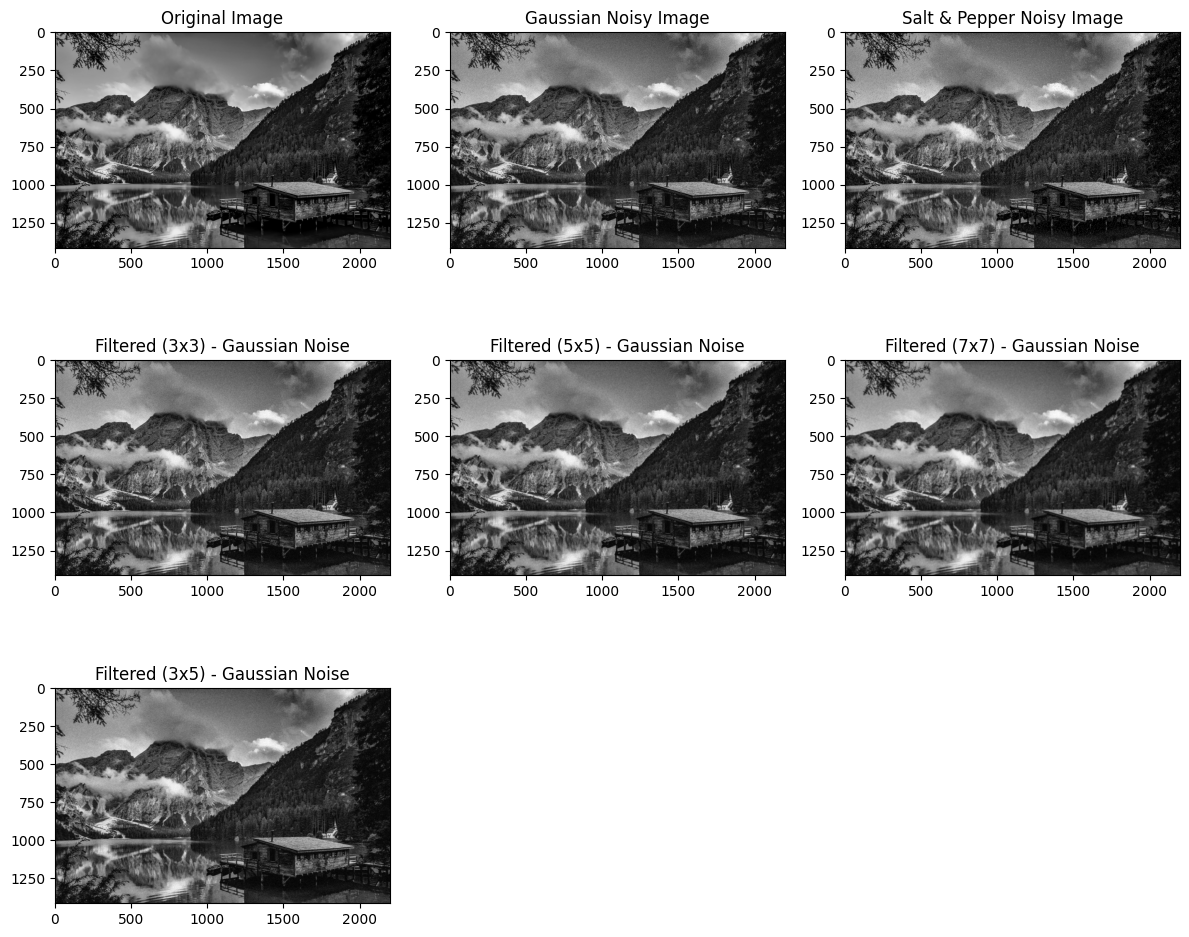

PSNR (3x3 filter): 24.239165432973486 dB, SSIM (3x3 filter): 0.6197721986522048
PSNR (5x5 filter): 22.109050702240197 dB, SSIM (5x5 filter): 0.5879348707629443
PSNR (7x7 filter): 21.2978797882292 dB, SSIM (7x7 filter): 0.5497992098192986
PSNR (3x5 filter): 23.41583232246665 dB, SSIM (3x5 filter): 0.6151372021814592


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Step 1: Load an image and add noise
image = cv2.imread(r'/home/student/Desktop/image1.jpg')  # Replace with your image path

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add Gaussian noise
gaussian_noise_image = random_noise(gray_image, mode='gaussian', mean=0, var=0.01)
gaussian_noise_image = np.uint8(gaussian_noise_image * 255)

# Add Salt-and-Pepper noise
salt_pepper_noise_image = random_noise(gray_image, mode='s&p', amount=0.05)
salt_pepper_noise_image = np.uint8(salt_pepper_noise_image * 255)

# Step 2: Define the function to apply moving average filters
def apply_moving_average_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)

# Step 3: Apply moving average filters with different kernel sizes
filtered_image_3x3 = apply_moving_average_filter(gaussian_noise_image, 3)
filtered_image_5x5 = apply_moving_average_filter(gaussian_noise_image, 5)
filtered_image_7x7 = apply_moving_average_filter(gaussian_noise_image, 7)

# Step 4: Compute PSNR and SSIM to evaluate performance
def compute_metrics(original, noisy, filtered):
    psnr_value = psnr(original, filtered)
    ssim_value = ssim(original, filtered)
    return psnr_value, ssim_value

psnr_gaussian_3x3, ssim_gaussian_3x3 = compute_metrics(gray_image, gaussian_noise_image, filtered_image_3x3)
psnr_gaussian_5x5, ssim_gaussian_5x5 = compute_metrics(gray_image, gaussian_noise_image, filtered_image_5x5)
psnr_gaussian_7x7, ssim_gaussian_7x7 = compute_metrics(gray_image, gaussian_noise_image, filtered_image_7x7)

# Step 5: Apply non-square kernel (e.g., 3x5)
def apply_non_square_kernel(image, kernel_size_x, kernel_size_y):
    kernel = np.ones((kernel_size_x, kernel_size_y), np.float32) / (kernel_size_x * kernel_size_y)
    return cv2.filter2D(image, -1, kernel)

filtered_image_3x5 = apply_non_square_kernel(gaussian_noise_image, 3, 5)
psnr_gaussian_3x5, ssim_gaussian_3x5 = compute_metrics(gray_image, gaussian_noise_image, filtered_image_3x5)

# Step 6: Display the images
plt.figure(figsize=(12, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

# Noisy Images
plt.subplot(3, 3, 2)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noisy Image')

plt.subplot(3, 3, 3)
plt.imshow(salt_pepper_noise_image, cmap='gray')
plt.title('Salt & Pepper Noisy Image')

# Filtered Images (Gaussian Noise)
plt.subplot(3, 3, 4)
plt.imshow(filtered_image_3x3, cmap='gray')
plt.title('Filtered (3x3) - Gaussian Noise')

plt.subplot(3, 3, 5)
plt.imshow(filtered_image_5x5, cmap='gray')
plt.title('Filtered (5x5) - Gaussian Noise')

plt.subplot(3, 3, 6)
plt.imshow(filtered_image_7x7, cmap='gray')
plt.title('Filtered (7x7) - Gaussian Noise')

# Filtered Image (Non-Square Kernel)
plt.subplot(3, 3, 7)
plt.imshow(filtered_image_3x5, cmap='gray')
plt.title('Filtered (3x5) - Gaussian Noise')

plt.tight_layout()
plt.show()

# Step 7: Print PSNR and SSIM values
print(f"PSNR (3x3 filter): {psnr_gaussian_3x3} dB, SSIM (3x3 filter): {ssim_gaussian_3x3}")
print(f"PSNR (5x5 filter): {psnr_gaussian_5x5} dB, SSIM (5x5 filter): {ssim_gaussian_5x5}")
print(f"PSNR (7x7 filter): {psnr_gaussian_7x7} dB, SSIM (7x7 filter): {ssim_gaussian_7x7}")
print(f"PSNR (3x5 filter): {psnr_gaussian_3x5} dB, SSIM (3x5 filter): {ssim_gaussian_3x5}")


In [ ]:
#1)a)-color

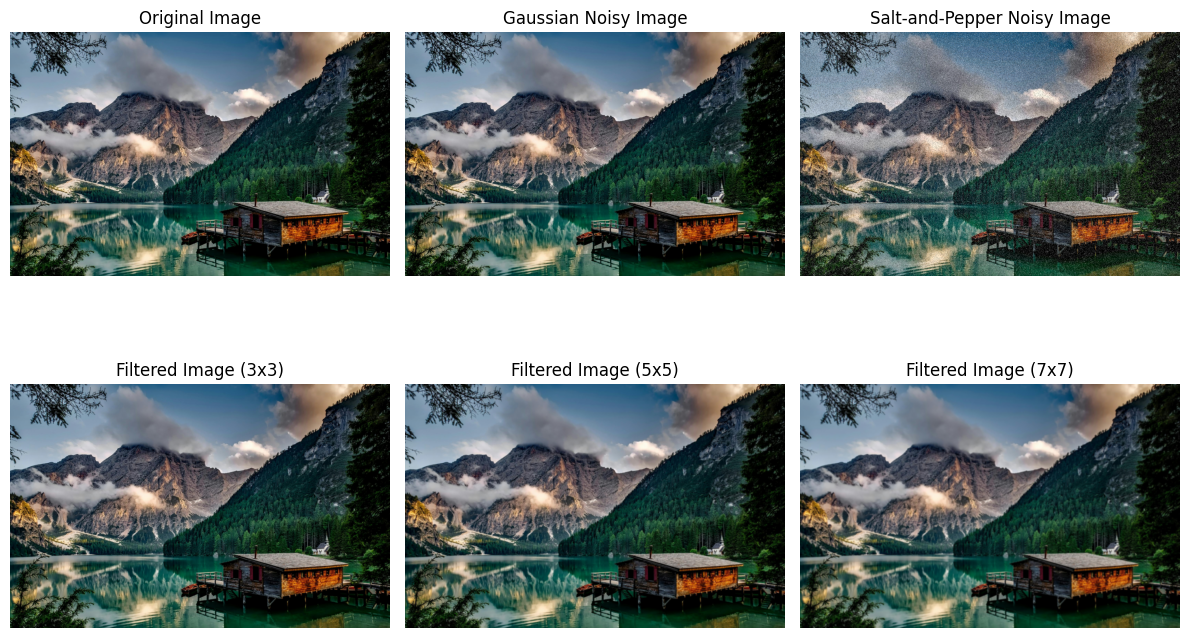

PSNR (3x3 filter): 25.916107543404095 dB, SSIM (3x3 filter): 0.8888160973887839
PSNR (5x5 filter): 22.544021097307862 dB, SSIM (5x5 filter): 0.7831029420894773
PSNR (7x7 filter): 21.552091994132326 dB, SSIM (7x7 filter): 0.7491076749679895
PSNR (3x5 filter): 24.286170558692955 dB, SSIM (3x5 filter): 0.8366678115244974


In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Step 1: Load image and add noise (Gaussian and salt-and-pepper noise)
image = cv2.imread(r'/home/student/Desktop/image1.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for color image processing

# Add Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.01):
    row, col, ch = image.shape
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_image

# Add salt-and-pepper noise
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * amount * 0.5)
    num_pepper = int(total_pixels * amount * 0.5)

    # Salt noise
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 255

    # Pepper noise
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

gaussian_noise_image = add_gaussian_noise(image)
salt_pepper_noise_image = add_salt_and_pepper_noise(image)

# Step 2: Apply moving average filters with different kernel sizes (e.g., 3x3, 5x5, 7x7)
def apply_moving_average_filter(image, kernel_size):
    return cv2.filter2D(image, -1, np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2))

filtered_image_3x3 = apply_moving_average_filter(gaussian_noise_image, 3)
filtered_image_5x5 = apply_moving_average_filter(gaussian_noise_image, 5)
filtered_image_7x7 = apply_moving_average_filter(gaussian_noise_image, 7)

# Step 3: Apply non-square kernel (e.g., 3x5)
def apply_non_square_kernel(image, kernel_size_x, kernel_size_y):
    return cv2.filter2D(image, -1, np.ones((kernel_size_x, kernel_size_y), np.float32) / (kernel_size_x * kernel_size_y))

filtered_image_3x5 = apply_non_square_kernel(gaussian_noise_image, 3, 5)

# Step 4: Compute PSNR and SSIM to evaluate performance for color images
def compute_metrics(original, noisy, filtered, win_size=3):
    # Ensure dimensions are the same
    filtered_resized = cv2.resize(filtered, (original.shape[1], original.shape[0]))

    psnr_value = psnr(original, filtered_resized)
    ssim_value = ssim(original, filtered_resized, multichannel=True, win_size=win_size)
    return psnr_value, ssim_value

# Compute metrics for Gaussian noise images with different filters
psnr_gaussian_3x3, ssim_gaussian_3x3 = compute_metrics(image, gaussian_noise_image, filtered_image_3x3, win_size=3)
psnr_gaussian_5x5, ssim_gaussian_5x5 = compute_metrics(image, gaussian_noise_image, filtered_image_5x5, win_size=3)
psnr_gaussian_7x7, ssim_gaussian_7x7 = compute_metrics(image, gaussian_noise_image, filtered_image_7x7, win_size=3)

# Compute metrics for non-square kernel (3x5)
psnr_gaussian_3x5, ssim_gaussian_3x5 = compute_metrics(image, gaussian_noise_image, filtered_image_3x5, win_size=3)

# Step 6: Display images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original image
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Gaussian noise image
axes[0, 1].imshow(gaussian_noise_image)
axes[0, 1].set_title('Gaussian Noisy Image')
axes[0, 1].axis('off')

# Salt-and-pepper noise image
axes[0, 2].imshow(salt_pepper_noise_image)
axes[0, 2].set_title('Salt-and-Pepper Noisy Image')
axes[0, 2].axis('off')

# Filtered images with 3x3, 5x5, 7x7 kernels
axes[1, 0].imshow(filtered_image_3x3)
axes[1, 0].set_title('Filtered Image (3x3)')
axes[1, 0].axis('off')

axes[1, 1].imshow(filtered_image_5x5)
axes[1, 1].set_title('Filtered Image (5x5)')
axes[1, 1].axis('off')

axes[1, 2].imshow(filtered_image_7x7)
axes[1, 2].set_title('Filtered Image (7x7)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Step 5: Print PSNR and SSIM values
print(f"PSNR (3x3 filter): {psnr_gaussian_3x3} dB, SSIM (3x3 filter): {ssim_gaussian_3x3}")
print(f"PSNR (5x5 filter): {psnr_gaussian_5x5} dB, SSIM (5x5 filter): {ssim_gaussian_5x5}")
print(f"PSNR (7x7 filter): {psnr_gaussian_7x7} dB, SSIM (7x7 filter): {ssim_gaussian_7x7}")
print(f"PSNR (3x5 filter): {psnr_gaussian_3x5} dB, SSIM (3x5 filter): {ssim_gaussian_3x5}")


In [20]:
#1)b)

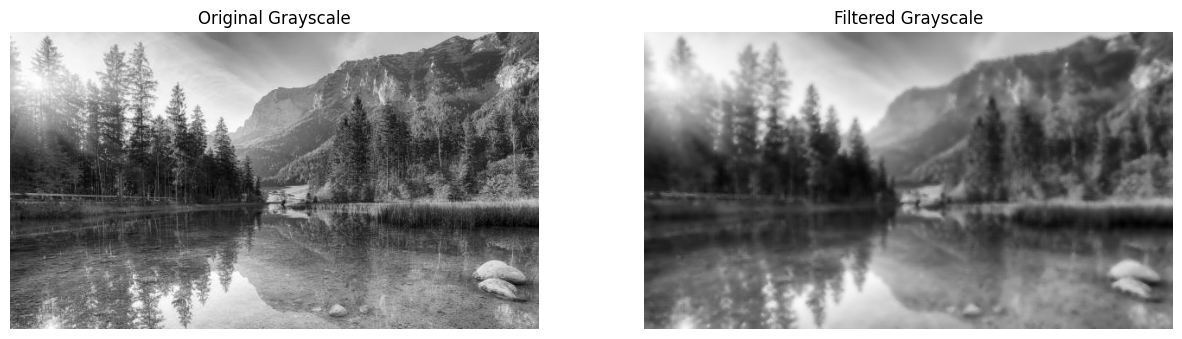

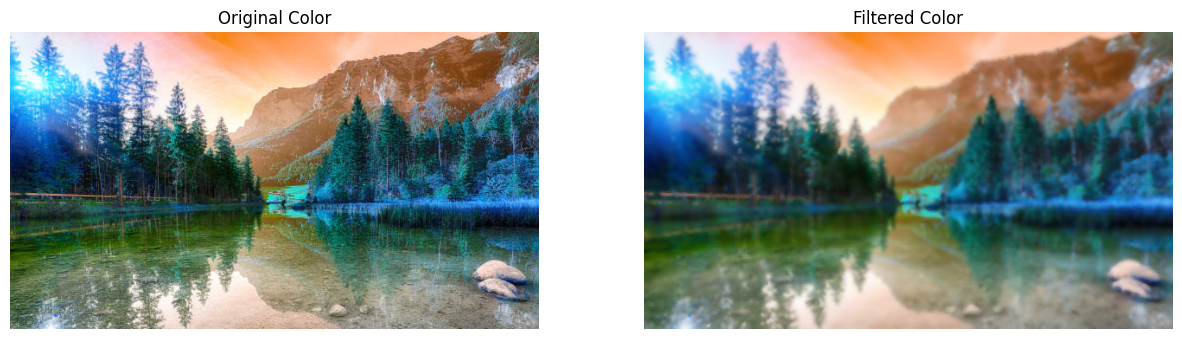

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_local_variance(image, window_size):
    mean = cv2.blur(image, (window_size, window_size))  # Local mean
    mean_sq = cv2.blur(image**2, (window_size, window_size))  # Mean of squared values
    local_variance = mean_sq - mean**2  # Variance = E[X^2] - (E[X])^2
    return local_variance

def adaptive_moving_average_filter(image, vlow, vhigh):
    """Apply an adaptive moving average filter based on local variance."""
    # Convert to float for processing
    image = image.astype(np.float32)
    
    # Calculate local variance using a 3x3 window
    local_variance = calculate_local_variance(image, window_size=3)
    
    # Initialize the output image
    filtered_image = np.zeros_like(image)
    
    # Define kernels for low and high variance regions
    small_kernel = (3, 3)
    large_kernel = (7, 7)
    
    # Process each pixel adaptively
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if local_variance[y, x] > vhigh:  # High-variance region
                kernel_size = small_kernel
            elif local_variance[y, x] < vlow:  # Low-variance region
                kernel_size = large_kernel
            else:  # Medium variance: use medium kernel
                kernel_size = (5, 5)
            
            # Define the region of interest (ROI) around the pixel
            k_h, k_w = kernel_size
            roi = image[max(0, y - k_h // 2):min(y + k_h // 2 + 1, image.shape[0]),
                        max(0, x - k_w // 2):min(x + k_w // 2 + 1, image.shape[1])]
            
            # Apply the moving average filter to the ROI
            filtered_image[y, x] = np.mean(roi)
    
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

def display_images(image_list, title_list):
    """Display images in Jupyter Notebook."""
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(image_list, title_list)):
        plt.subplot(1, len(image_list), i + 1)
        cmap = 'gray' if len(img.shape) == 2 else None
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the image
image_path = r"/home/student/Desktop/image2.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set variance thresholds
vlow = 100
vhigh = 1000

# Apply adaptive moving average filter for grayscale
filtered_gray = adaptive_moving_average_filter(gray_image, vlow, vhigh)

# Apply adaptive moving average filter for color image
filtered_color = np.zeros_like(image)
for channel in range(3):  # Process each color channel independently
    filtered_color[..., channel] = adaptive_moving_average_filter(image[..., channel], vlow, vhigh)

# Display results
display_images([gray_image, filtered_gray], ["Original Grayscale", "Filtered Grayscale"])
display_images([image, filtered_color], ["Original Color", "Filtered Color"])


In [33]:
#2

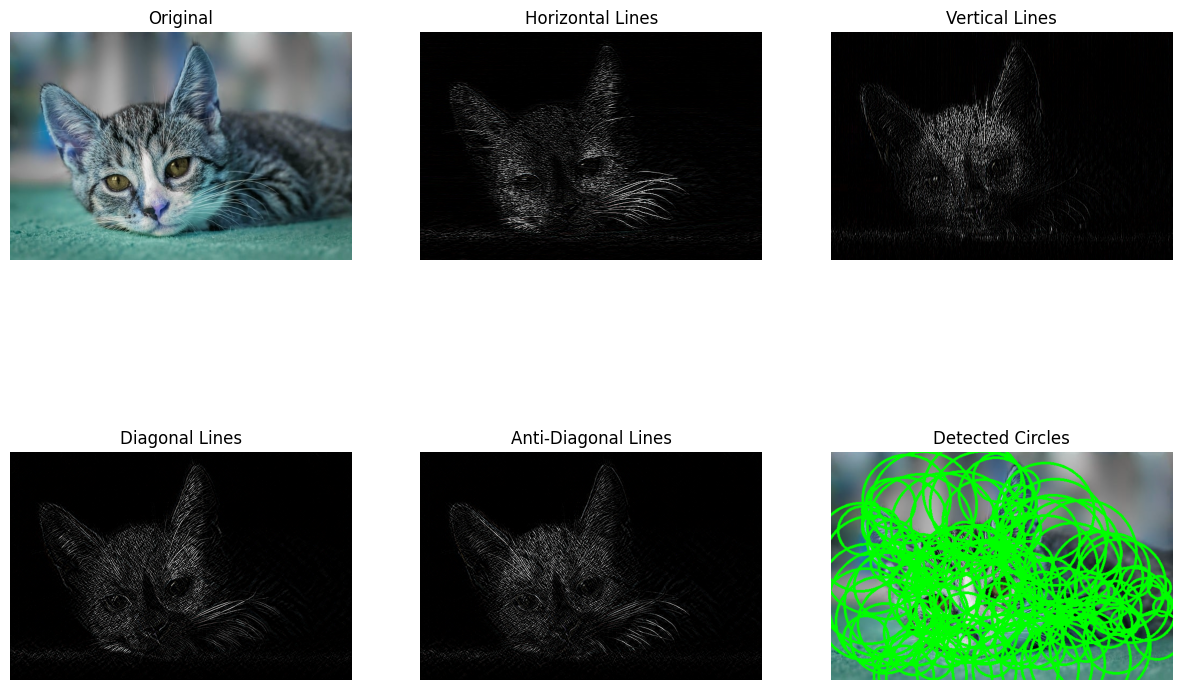

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_kernel(image, kernel):
    """Apply the given kernel to the image using convolution."""
    return cv2.filter2D(image, -1, kernel)

def detect_circles(image):
    """Detect circles using Hough Circle Transform."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.medianBlur(gray_image, 5)
    circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=10, maxRadius=100)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)  # Draw circles on the original image
    return image

def visualize_images(image_list, title_list):
    """Visualize the original and processed images."""
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(image_list, title_list)):
        plt.subplot(2, len(image_list)//2, i + 1)
        cmap = 'gray' if len(img.shape) == 2 else None
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Define custom kernels for pattern detection
horizontal_kernel = np.array([[-1, -1, -1],
                              [ 2,  2,  2],
                              [-1, -1, -1]])

vertical_kernel = np.array([[-1,  2, -1],
                            [-1,  2, -1],
                            [-1,  2, -1]])

diagonal_kernel = np.array([[-1, -1,  2],
                            [-1,  2, -1],
                            [ 2, -1, -1]])

anti_diagonal_kernel = np.array([[ 2, -1, -1],
                                 [-1,  2, -1],
                                 [-1, -1,  2]])

# Load the image
image_path = "/home/student/Desktop/cat.jpg"  # Replace with the correct image path
image = cv2.imread(image_path)

# Apply the custom kernels
horizontal_result = apply_kernel(image, horizontal_kernel)
vertical_result = apply_kernel(image, vertical_kernel)
diagonal_result = apply_kernel(image, diagonal_kernel)
anti_diagonal_result = apply_kernel(image, anti_diagonal_kernel)

# Detect circles in the image
image_with_circles = detect_circles(image.copy())

# Visualize the results
visualize_images([image, horizontal_result, vertical_result, diagonal_result, anti_diagonal_result, image_with_circles],
                 ["Original", "Horizontal Lines", "Vertical Lines", "Diagonal Lines", "Anti-Diagonal Lines", "Detected Circles"])
